# Statistics Task Set Assignment

Reeha Parkar  
SAP ID: 60001180046  
Date of assignment: 23/10/2020

In [1]:
# import statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# reading the file
data = pd.read_csv('Toyota.csv')

In [3]:
# printing first 10 rows
data.head(10)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
7,7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245
8,8,21500,27.0,19700,Petrol,192,0.0,0,1800,3,1185
9,9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105


1. Descriptive statistics 

In [4]:
# Getting all the statistical data column-wise
data.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


2. Scatterplot for 2 variables, label, title

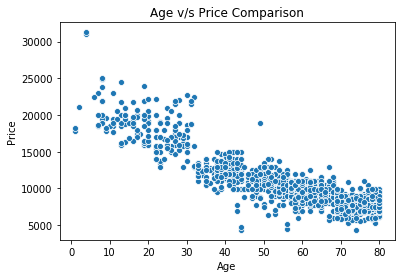

In [5]:
sns.scatterplot(data=data, x='Age', y='Price')
plt.title('Age v/s Price Comparison')
plt.show()

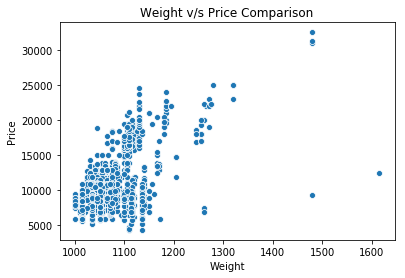

In [6]:
sns.scatterplot(data=data, x='Weight', y='Price')
plt.title('Weight v/s Price Comparison')
plt.show()

3.Histogram for Numerical data , label, title

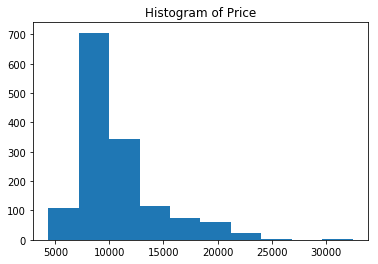

In [7]:
plt.hist(data['Price'])
plt.title('Histogram of Price')
plt.show()

4.Bar Plot for Categorical data, lable, title,ticks

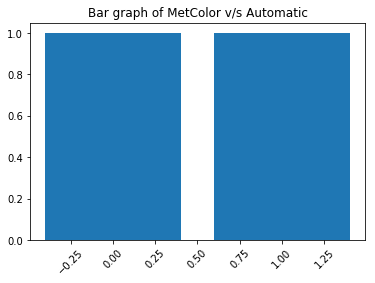

In [8]:
plt.bar(x=data['MetColor'], height=data['Automatic'])
plt.title('Bar graph of MetColor v/s Automatic')
plt.xticks(rotation=45)
plt.show()

5. sns.set

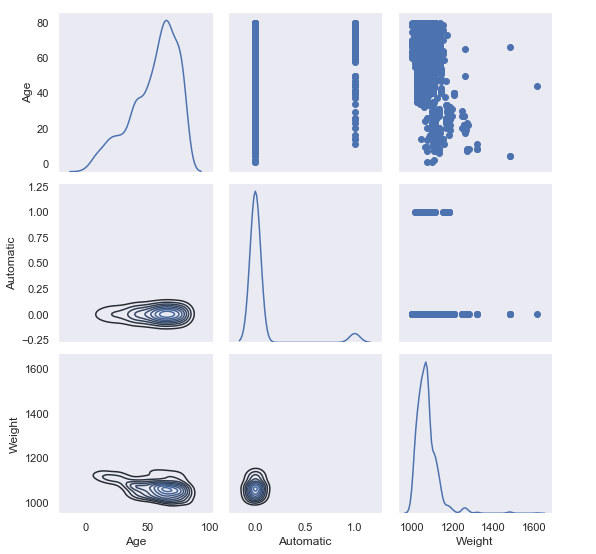

In [23]:
sns.set(style='dark')
df = data.loc[:, ['Age', 'Automatic', 'Weight']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, lw=3)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
plt.show()

6. sns.regplot

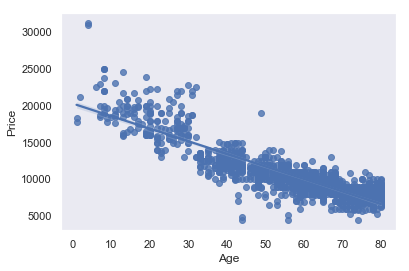

In [22]:
sns.regplot(data=data, x="Age", y="Price", fit_reg=True)
plt.show()

7. sns.lmplot

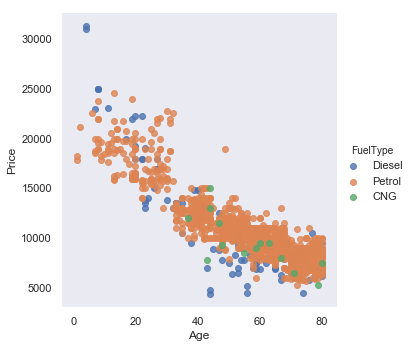

In [11]:
sns.lmplot(x='Age', y='Price', data=data, fit_reg=False, hue='FuelType')
plt.show()

8. sns.distplot

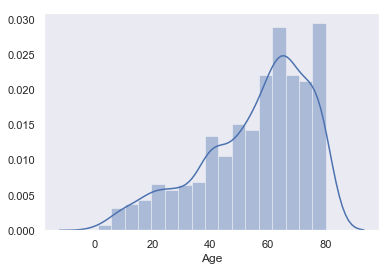

In [12]:
sns.distplot(data['Age'])
plt.show()

9. sns.countplot , hue 

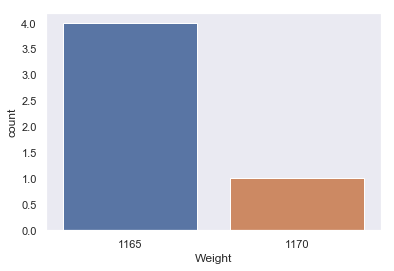

In [13]:
sns.countplot(data['Weight'][:5])
plt.show()

10.Box plot

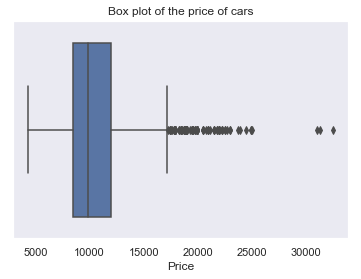

In [14]:
sns.boxplot(data['Price']).set_title('Box plot of the price of cars')
plt.show()

11. Grouped box & histogram plot

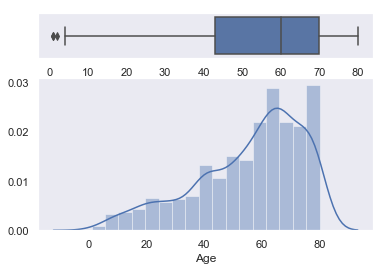

In [15]:
f,(ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.3, 1)})
sns.boxplot(data['Age'], ax=ax_box)
sns.distplot(data['Age'], ax=ax_hist)
plt.show()

12. Pairwise plot

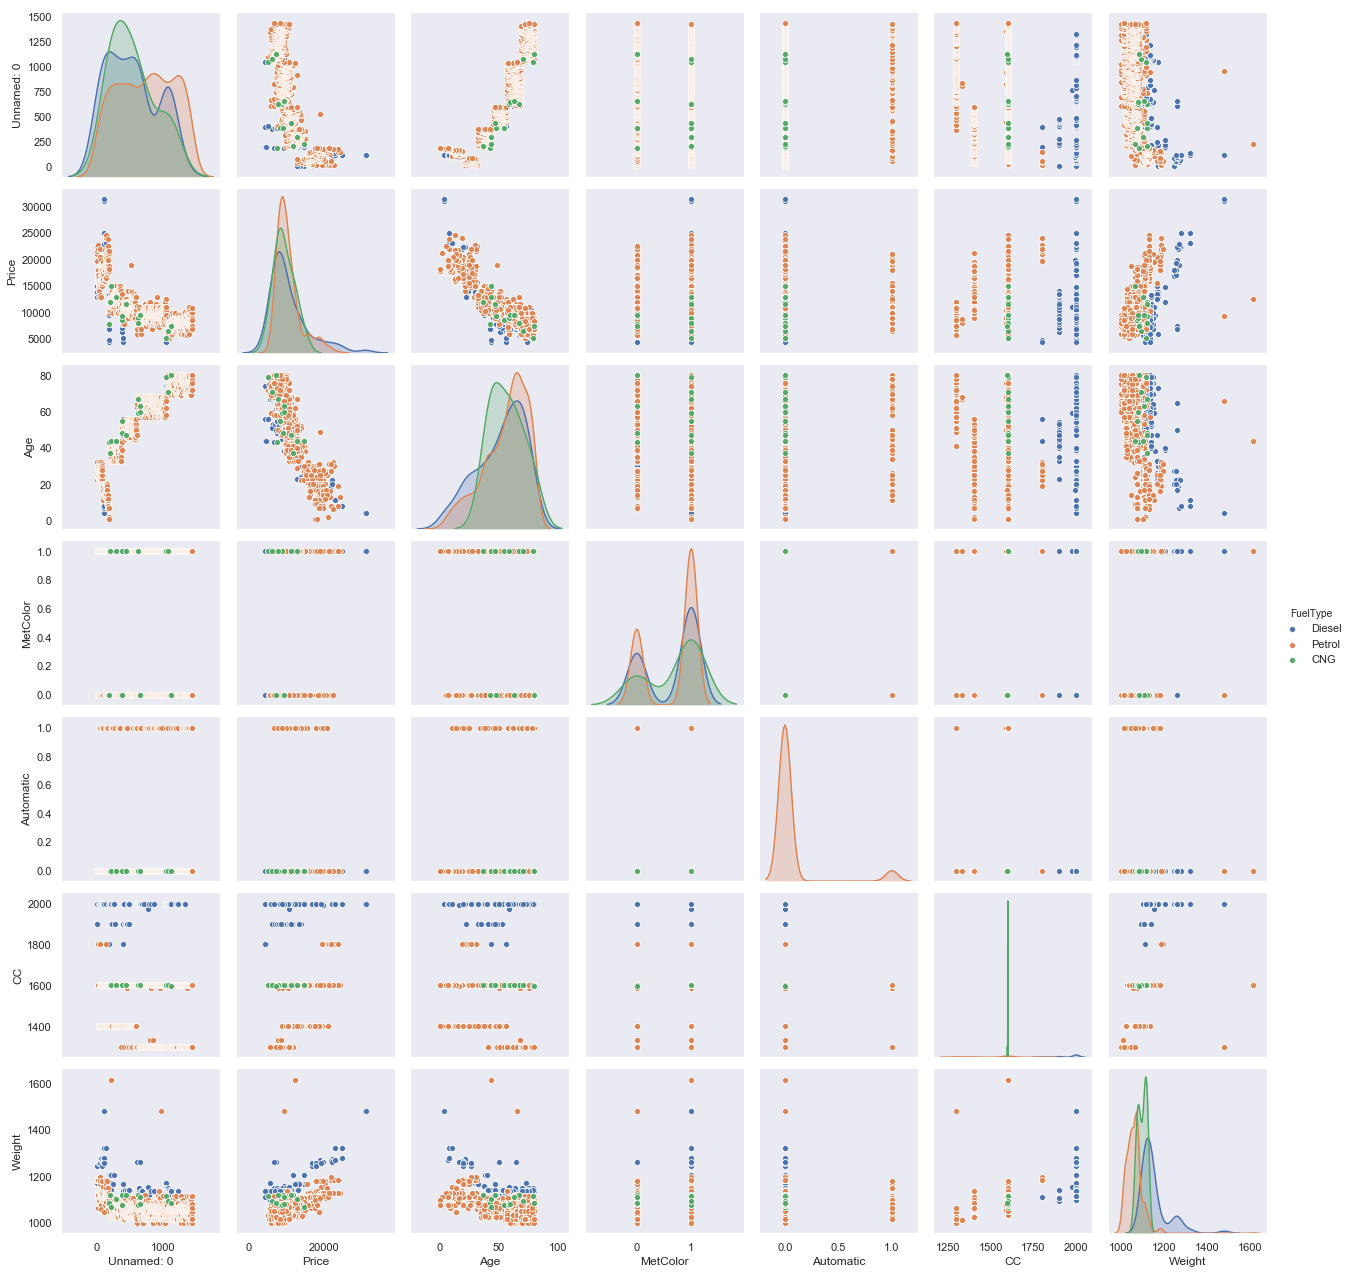

In [20]:
sns.pairplot(data=data, hue='FuelType')
plt.show()

I. Detecting outliers from 'Price' column

In [17]:
def detect_outliers(data, lb, ub):
    outliers = []
    for i in data:
        if i<=lb or i>=ub:
            outliers.append(i)
    return outliers
# Getting the 25% and 75% values for the inter quartile range of the 'Price' column
Q1, Q3 = np.percentile(data['Price'], [25, 75])
print('Q1 = ', Q1)
print('Q3 = ', Q3)

# Calculating the Inter Quartile Range (middle 50% of the data)
IQR = Q3 - Q1
print('IQR = ', IQR)

# Getting the lower and upper bounds to get outliers beyond these values
lb = Q1 - (1.5*IQR)
ub = Q3 + (1.5*IQR)
print('Lower bound = ', lb)
print('Upper bound = ', ub)

# Applying the function to 'tip' column
outliers = detect_outliers(data['Price'], lb, ub)
y = set(outliers)
print('Outliers of the Price column are: ',y)
print('Number of outliers of the Price column are: ',len(y))

Q1 =  8450.0
Q3 =  11950.0
IQR =  3500.0
Lower bound =  3200.0
Upper bound =  17200.0
Outliers of the Price column are:  {17795, 21125, 18950, 18700, 23950, 20750, 19600, 18450, 20500, 31000, 17950, 24990, 22950, 19750, 18600, 17450, 31275, 19500, 18990, 17200, 19250, 24500, 19000, 19900, 18750, 21950, 18500, 18245, 23750, 18900, 20950, 17495, 23000, 22750, 17250, 22500, 22250, 17900, 19950, 22000, 18800, 17650, 32500, 24950, 21750, 19450, 21500}
Number of outliers of the Price column are:  47


II. Heatmap

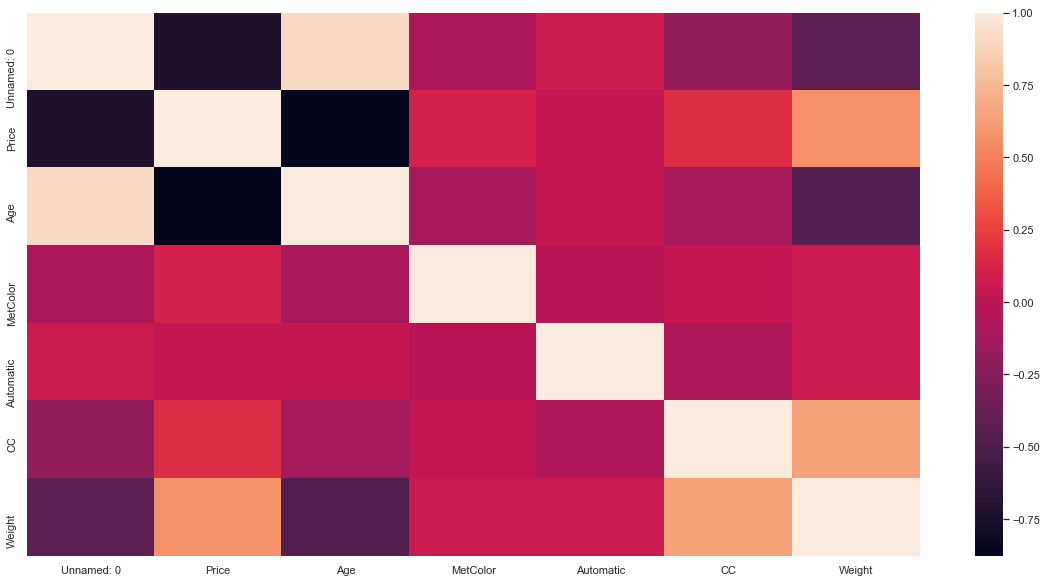

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=False) 
plt.show()

III. Swarmplot

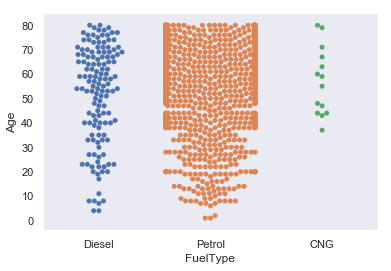

In [19]:
sns.swarmplot(data=data, x='FuelType', y='Age')
plt.show()